In [1]:
import sys

import numpy  as np
import pandas as pd
import gc
import pprint
import hashlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [2]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
842,a9567bff547b14bf43f49af3abe1278257915605,2019,0.0,0.0,0.0,61.0,55.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,231.0,17.0,0.0,0.0,0.0,68.0
152,18dcddd3d2e3c90cb32da809bb854e5f89350e19,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0458b6e4b63c68f8680ac56abad2f5031d780013,2020,16.0,0.0,0.0,0.0,32.0,8.0,14.0,0.0,...,0.0,0.0,7.0,0.0,0.0,9.0,8.0,153.0,0.0,0.0
565,6f8930c11282ac4813572a8db240a8dde925fa01,2019,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,4.0,4.0
357,428d41f2b2a4d4475c752f5e558747893821fa58,2019,0.0,0.0,24.0,0.0,450.0,214.0,42.0,2.0,...,0.0,23.0,125.0,0.0,0.0,2051.0,0.0,0.0,1832.0,1680.0


,id,ano,Preço_sum,Média_sum,Variação_sum
329,3d99274ce1838a3d1a07f71d3f27068ef9d5f720,2019,136.26,77.65,4.71
23,03b9cfbd7605efb580d8a38a81a443ab823b328e,2019,2.00,0.00,0.00
1149,e56896e9bd7426de5236ee5280c369328818c6c3,2020,1.77,-3.10,-0.23
778,9f158786ef0b403c9aedfe8b922edfcf4cb8816b,2019,3.14,2.21,0.09
1033,d04122a8f3848b982342f8b819e1044b8f8b9761,2019,243.68,106.60,4.99


,id,ano,pos_first
445,5852f339c94e7e8c7a05253794606c20c4416d1f,2020,LAT
524,65dada5279a1a38d28074cf43ddaa2fc5af5bbd3,2020,ATA
1004,cb1c443e7491bb511642b2597db85cc61d07abfe,2019,TEC
1105,ddaf4b4857fa4cc812775327035f2c727fb65df4,2019,ZAG
562,6d68686d1f68be1d1bfdeb3493a9d9666a5c331b,2020,MEI


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

# naive

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## agglomerative hierarchical 

In [4]:
%matplotlib inline

import scipy.cluster.hierarchy as hierarchical
from sklearn.cluster       import AgglomerativeClustering

In [5]:
scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy()
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )
X.shape

(1283, 23)

CPU times: user 157 ms, sys: 7.31 ms, total: 164 ms
Wall time: 162 ms


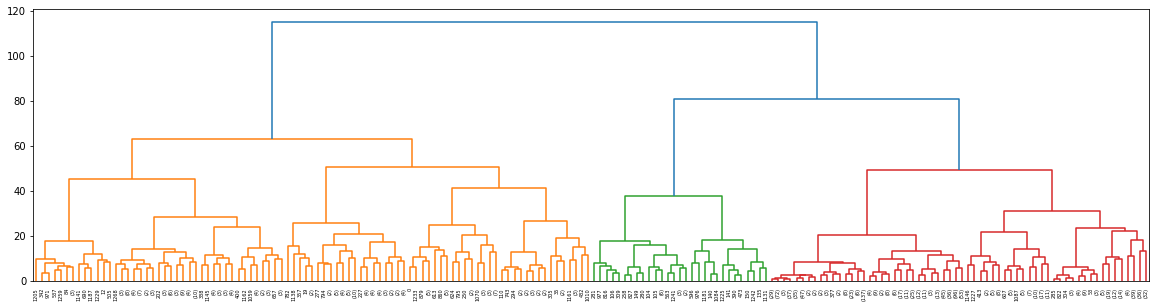

In [6]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='ward'), truncate_mode='level', p=7 )

- - -

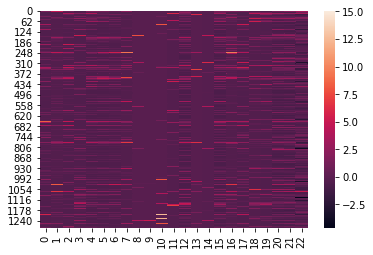

In [7]:
sns.heatmap(X);

/home/dusodeth/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


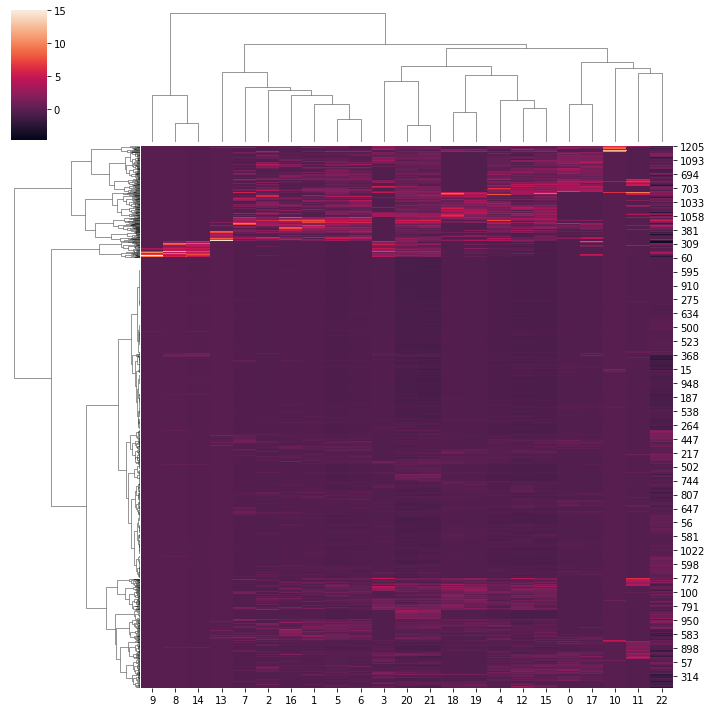

In [8]:
sns.clustermap(X, method='ward');

- - -

In [9]:
analise = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos['pos_first']], axis=1).copy()

In [10]:
%%time
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggclu.fit_predict(X)

analise['classe'] = aggclu.labels_
analise['cell']   = 1

CPU times: user 25.8 ms, sys: 5.07 ms, total: 30.9 ms
Wall time: 30.7 ms


In [11]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [12]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,16,42,0,42,8,177
GOL,0,0,37,2,0,57
LAT,33,1,0,52,12,102
MEI,38,15,0,81,34,240
TEC,0,0,0,22,0,69
ZAG,24,0,0,60,4,115


CPU times: user 251 ms, sys: 720 ms, total: 971 ms
Wall time: 64.8 ms


Text(0.5, 0, 'z')

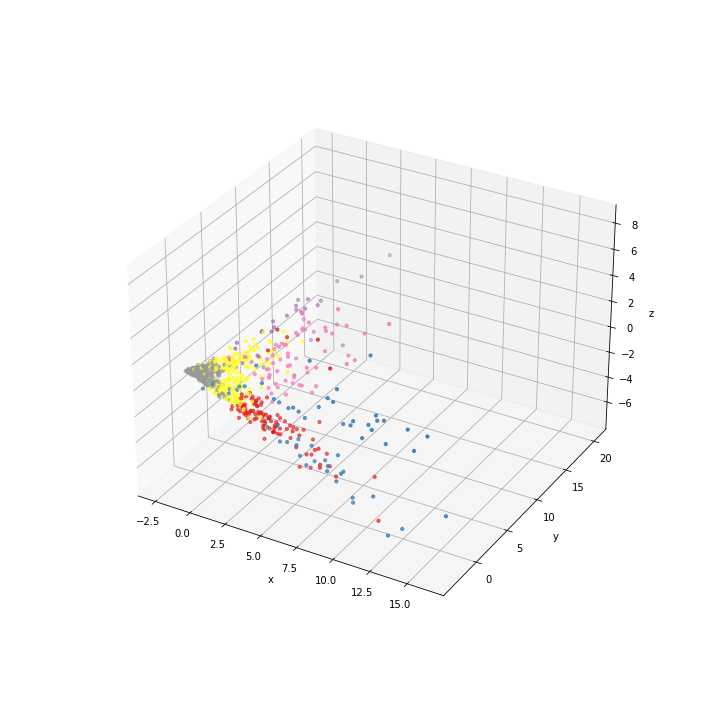

In [13]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = aggclu.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## spectral

In [14]:
%matplotlib inline

from sklearn.cluster import SpectralClustering

In [15]:
%%time
spectral = SpectralClustering(n_clusters=6, 
                              random_state=22, 
                              n_neighbors=10, 
                              affinity='nearest_neighbors')
spectral.fit_predict(X)

analise['classe'] = spectral.labels_
analise['cell']   = 1

CPU times: user 1.3 s, sys: 2.36 s, total: 3.66 s
Wall time: 254 ms


In [16]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,34,105,25,0,121,0
GOL,14,0,18,0,25,39
LAT,24,85,24,0,67,0
MEI,50,157,45,0,156,0
TEC,9,0,7,41,34,0
ZAG,23,76,27,0,77,0


- - -

+ [Getting Started with Spectral Clustering by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/spectral_clustering/)
+ [The Spectral Theorem for Matrices by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/the-spectral-theorem-for-matrices/)
+ [Laplacian matrix @ Wikipedia](https://en.wikipedia.org/wiki/Laplacian_matrix)

CPU times: user 287 ms, sys: 600 ms, total: 887 ms
Wall time: 58.9 ms


Text(0.5, 0, 'z')

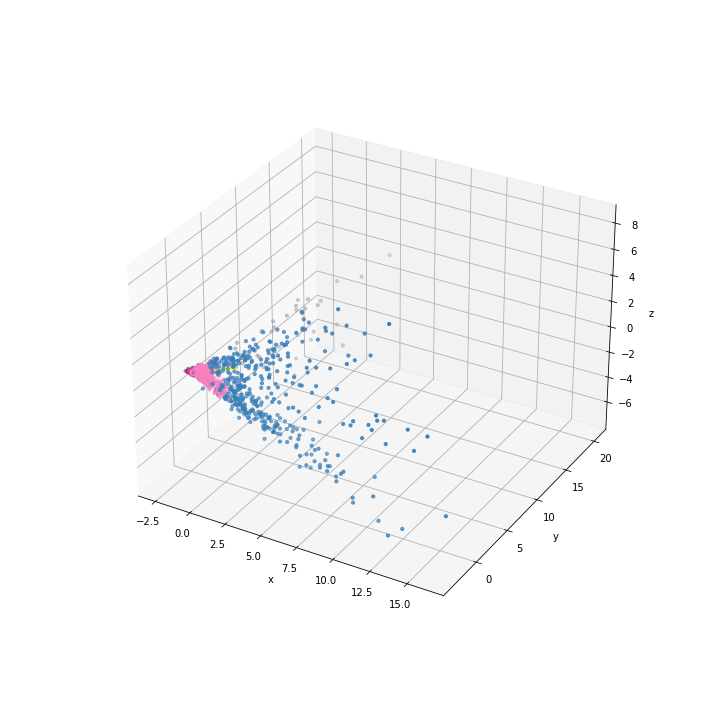

In [17]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = spectral.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## dbscan

In [18]:
%matplotlib inline

import hdbscan

In [19]:
%%time
dbscan = hdbscan.HDBSCAN(min_cluster_size=3, 
                         min_samples=1,
                        cluster_selection_epsilon=3.0)
dbscan.fit_predict(X)

analise['classe'] = dbscan.labels_
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 68.7 ms, sys: 1.13 ms, total: 69.9 ms
Wall time: 69.6 ms


classe,-1,0,1,2,3,4,5,6,7,8
pos_first,,,,,,,,,,
ATA,45,5,0,0,0,0,0,0,0,235
GOL,21,0,6,0,0,0,0,0,3,66
LAT,28,0,0,1,0,0,3,0,0,168
MEI,54,0,0,0,3,3,0,3,0,345
TEC,0,0,0,0,0,0,0,0,0,91
ZAG,18,0,0,4,0,0,0,0,0,181


CPU times: user 323 ms, sys: 526 ms, total: 849 ms
Wall time: 59.8 ms


Text(0.5, 0, 'z')

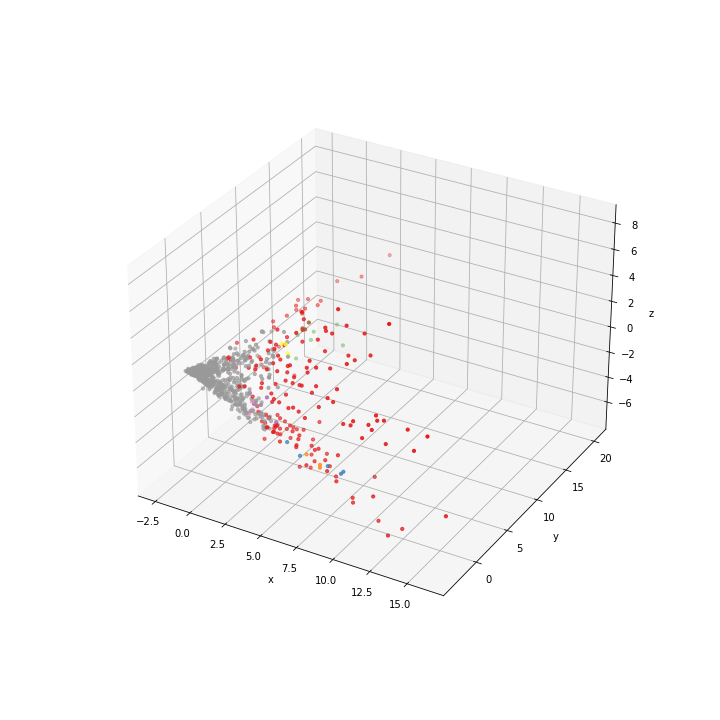

In [20]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = dbscan.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## som

In [21]:
%matplotlib inline

import somoclu

CPU times: user 3.57 s, sys: 85.2 ms, total: 3.65 s
Wall time: 238 ms


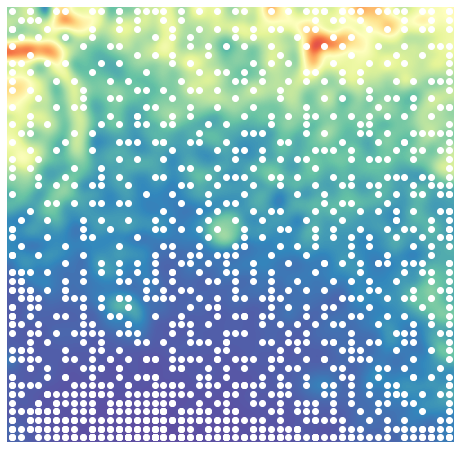

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [22]:
n_rows, n_columns = 50, 50
som = somoclu.Somoclu(n_columns, n_rows, 
                      compactsupport=False)
%time som.train(X)

som.view_umatrix(bestmatches=True)

- - -

In [23]:
%matplotlib inline

from minisom import MiniSom

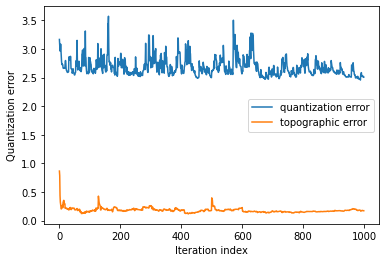

CPU times: user 1.42 s, sys: 9.88 ms, total: 1.43 s
Wall time: 1.43 s


In [24]:
%%time

som_shape = (1, 6)

som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

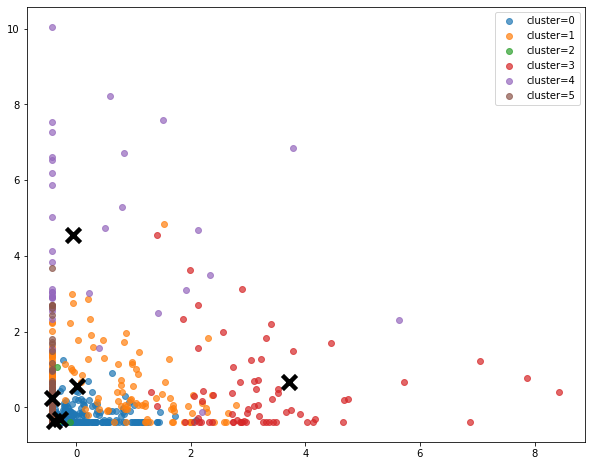

In [25]:
winner_coordinates = np.array([som.winner(x) for x in X]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.legend()

In [26]:
%%time

analise['classe'] = cluster_index
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 6.8 ms, sys: 0 ns, total: 6.8 ms
Wall time: 6.09 ms


classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,190,61,0,4,28,2
GOL,67,0,29,0,0,0
LAT,126,36,0,24,0,14
MEI,276,70,0,28,7,27
TEC,86,5,0,0,0,0
ZAG,138,41,0,12,0,12


CPU times: user 179 ms, sys: 661 ms, total: 840 ms
Wall time: 57.7 ms


Text(0.5, 0, 'z')

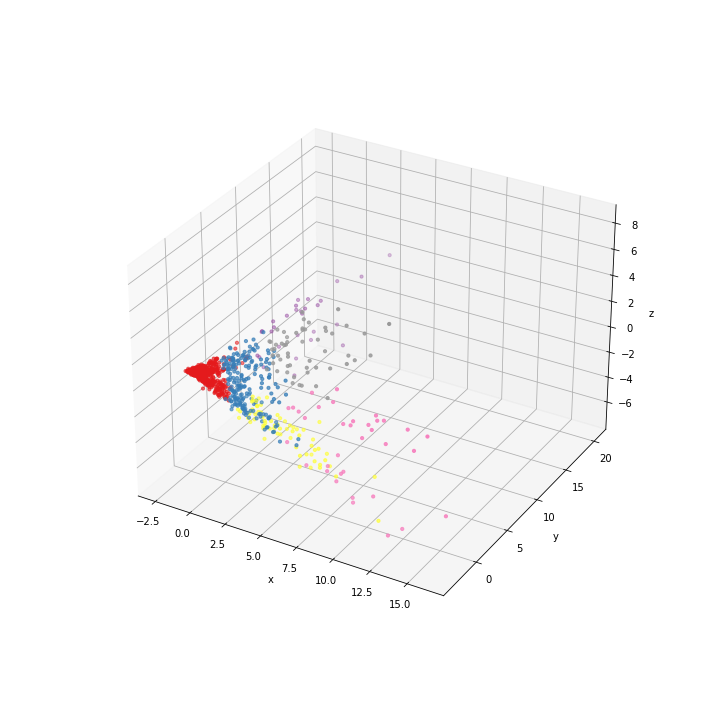

In [27]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = cluster_index

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# seleção

In [28]:
sys.path.insert(1, '/home/dusodeth/Documents/data/feature-selector/feature_selector/')

from feature_selector import FeatureSelector

In [29]:
X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy()
X['TARGET'] = 1

fs = FeatureSelector(data   = X.drop(columns="TARGET"), 
                     labels = X["TARGET"])

0 features with greater than 0.50 missing values.

[]


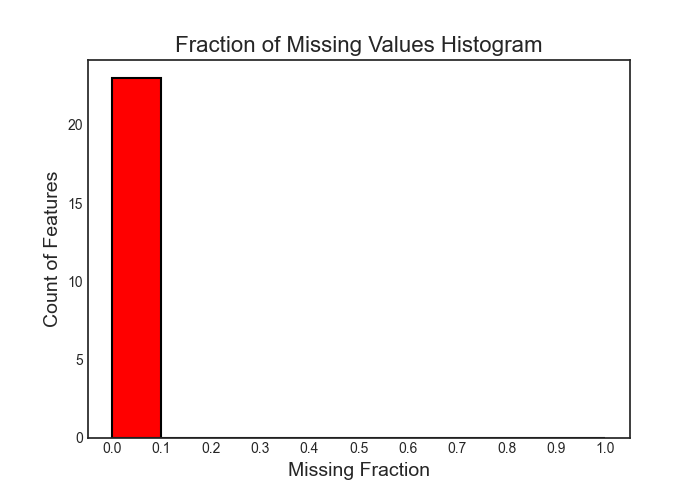

In [30]:
fs.identify_missing(missing_threshold = 0.5)
missing_features = fs.ops['missing']
print(missing_features)

fs.plot_missing()

0 features with a single unique value.

[]


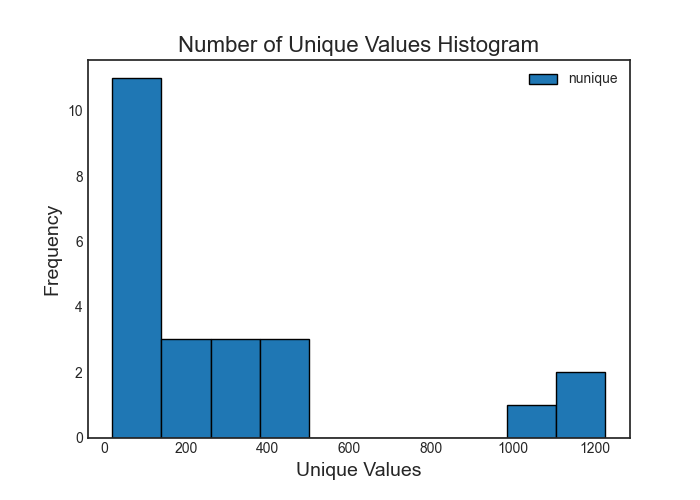

In [31]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
print(single_unique)

fs.plot_unique()

15 features with a correlation magnitude greater than 0.50.

['A_sum', 'FS_sum', 'FF_sum', 'FD_sum', 'FT_sum', 'DP_sum', 'CA_sum', 'GS_sum', 'FC_sum', 'I_sum', 'PI_sum', 'RB_sum', 'PE_sum', 'Preço_sum', 'Média_sum']


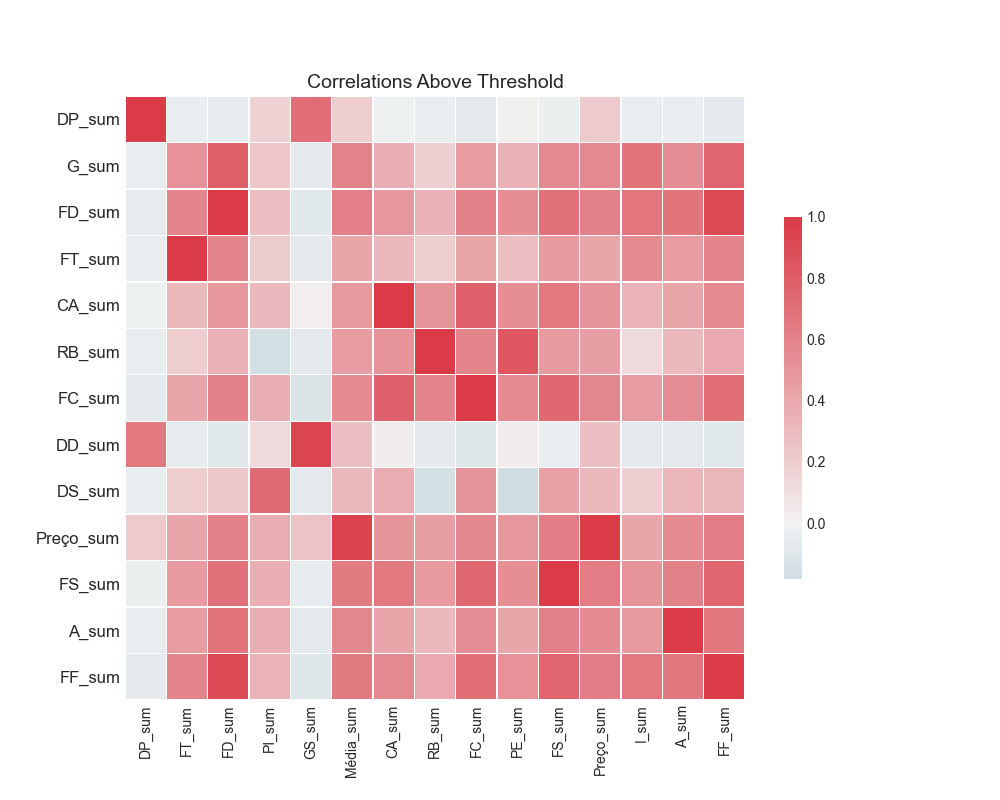

In [32]:
fs.identify_collinear(correlation_threshold=0.5)
correlated_features = fs.ops['collinear']
print(correlated_features)

fs.plot_collinear()

In [33]:
drop_ = missing_features + single_unique + correlated_features
drop_

['A_sum',
 'FS_sum',
 'FF_sum',
 'FD_sum',
 'FT_sum',
 'DP_sum',
 'CA_sum',
 'GS_sum',
 'FC_sum',
 'I_sum',
 'PI_sum',
 'RB_sum',
 'PE_sum',
 'Preço_sum',
 'Média_sum']

- - -

In [34]:
scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy().drop(columns=drop_)
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )
X.shape

(1283, 8)

## agglomerative hierarchical 

In [35]:
%matplotlib inline

import scipy.cluster.hierarchy as hierarchical
from sklearn.cluster       import AgglomerativeClustering

CPU times: user 123 ms, sys: 2.18 ms, total: 125 ms
Wall time: 122 ms


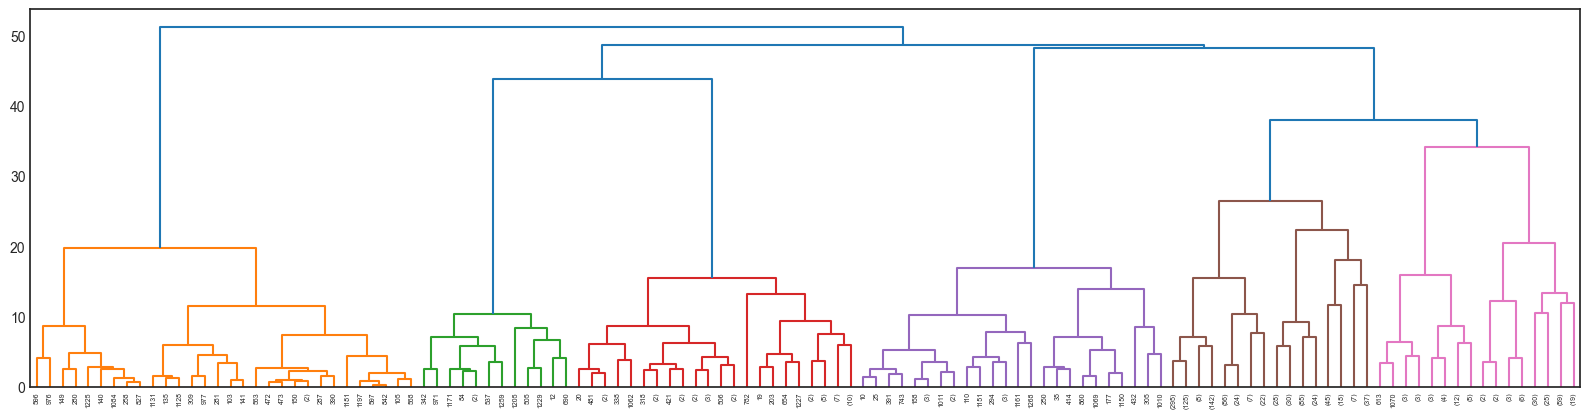

In [36]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='ward'), truncate_mode='level', p=7 )

- - -

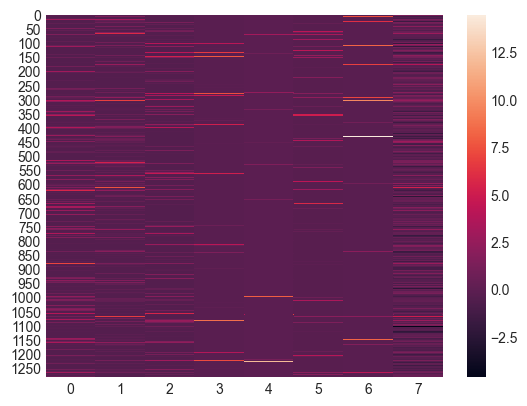

In [37]:
sns.heatmap(X);

/home/dusodeth/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


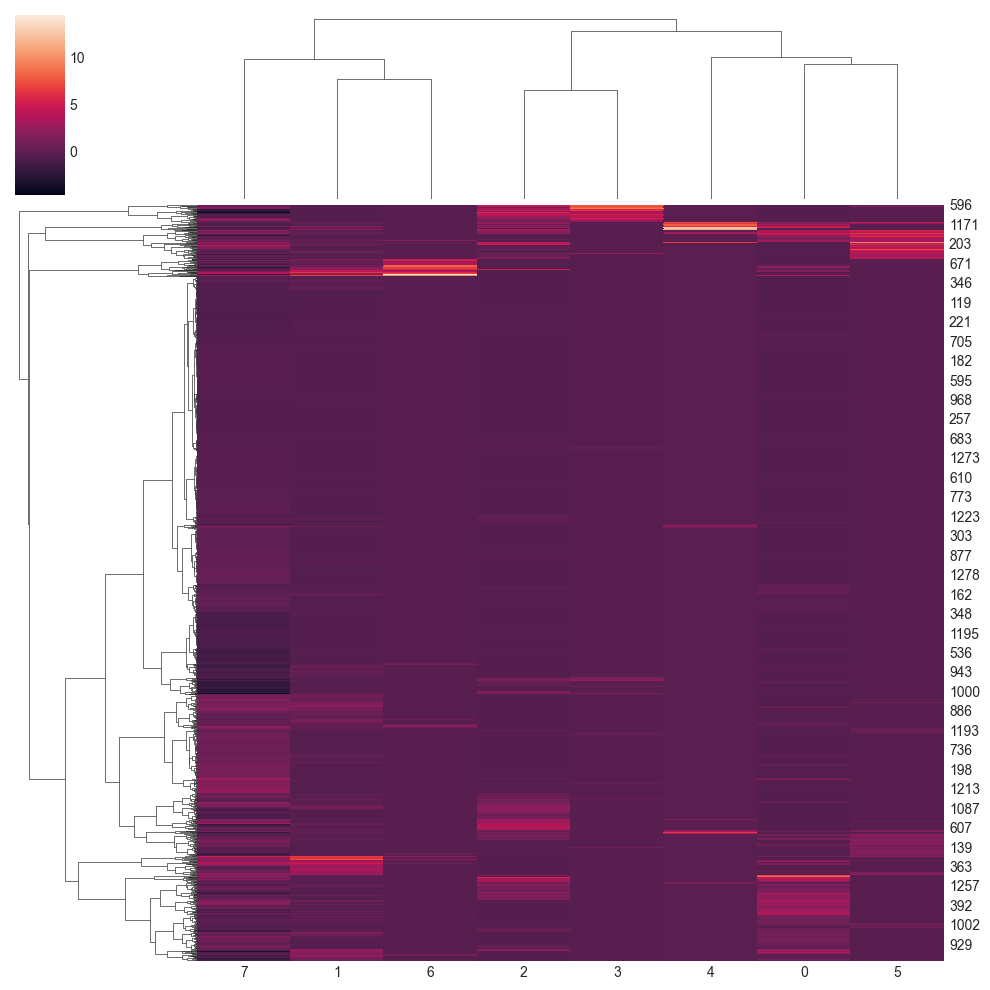

In [38]:
sns.clustermap(X, method='ward');

- - -

In [39]:
analise = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos['pos_first']], axis=1).copy()

In [40]:
for i in range(X.shape[1]):
    print(i, analise.columns[i])

0 DS_sum
1 G_sum
2 A_sum
3 SG_sum
4 FS_sum
5 FF_sum
6 FD_sum
7 FT_sum


In [41]:
%%time
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
aggclu.fit_predict(X)

analise['classe'] = aggclu.labels_
analise['cell']   = 1

CPU times: user 21.8 ms, sys: 1.14 ms, total: 23 ms
Wall time: 22.8 ms


In [42]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [43]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,285,0,0,0,0,0
GOL,94,0,2,0,0,0
LAT,193,4,0,0,1,2
MEI,403,2,0,1,0,2
TEC,91,0,0,0,0,0
ZAG,194,8,0,0,1,0


CPU times: user 98.5 ms, sys: 219 ms, total: 317 ms
Wall time: 25.6 ms


Text(0.5, 0, 'z')

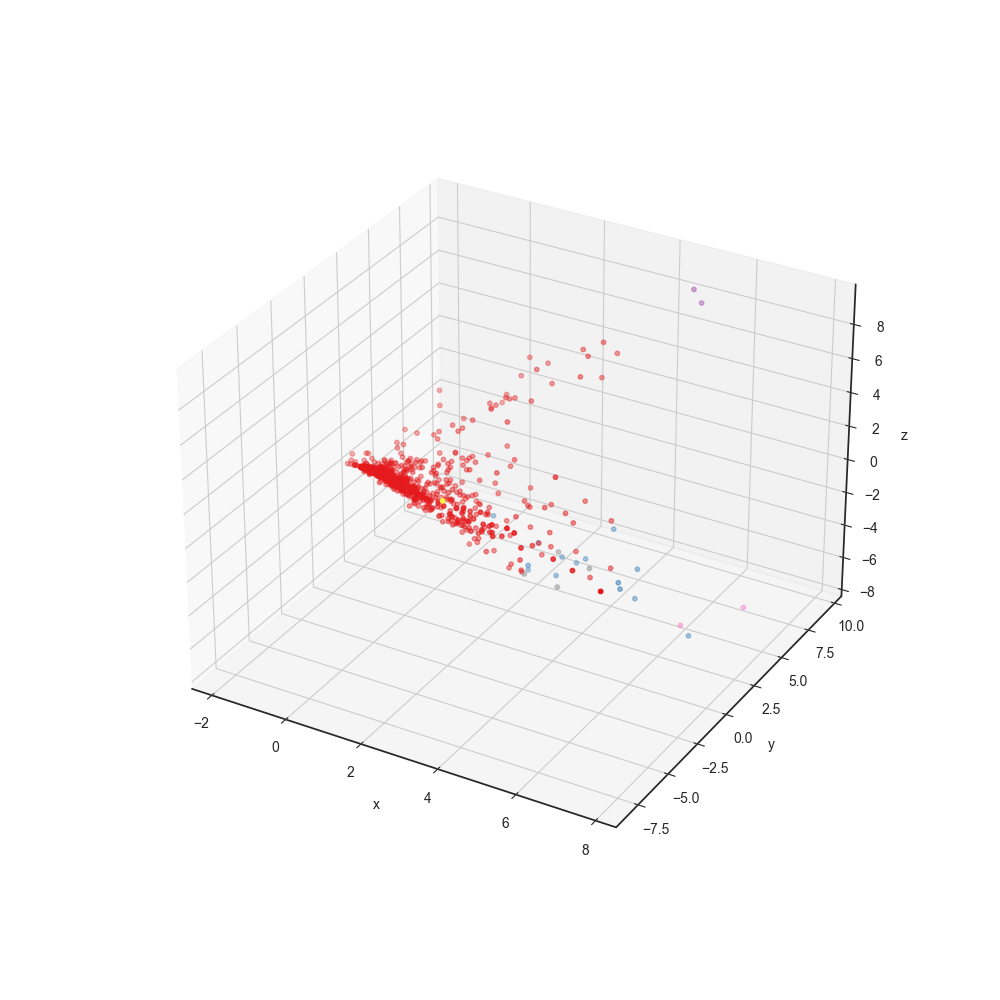

In [44]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = aggclu.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## spectral

In [45]:
%matplotlib inline

from sklearn.cluster import SpectralClustering

In [46]:
%%time
spectral = SpectralClustering(n_clusters=6, 
                              random_state=22, 
                              n_neighbors=50, 
                              affinity='nearest_neighbors')
spectral.fit_predict(X)

analise['classe'] = spectral.labels_
analise['cell']   = 1

CPU times: user 1.05 s, sys: 1.56 s, total: 2.61 s
Wall time: 293 ms


In [47]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,27,120,20,46,42,30
GOL,42,10,12,5,9,18
LAT,101,15,17,27,20,20
MEI,99,98,33,68,60,50
TEC,0,27,16,23,16,9
ZAG,99,14,19,25,18,28


- - -

+ [Getting Started with Spectral Clustering by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/spectral_clustering/)
+ [The Spectral Theorem for Matrices by Dr. Juan Camilo Orduz](https://juanitorduz.github.io/the-spectral-theorem-for-matrices/)
+ [Laplacian matrix @ Wikipedia](https://en.wikipedia.org/wiki/Laplacian_matrix)

CPU times: user 111 ms, sys: 238 ms, total: 348 ms
Wall time: 27.8 ms


Text(0.5, 0, 'z')

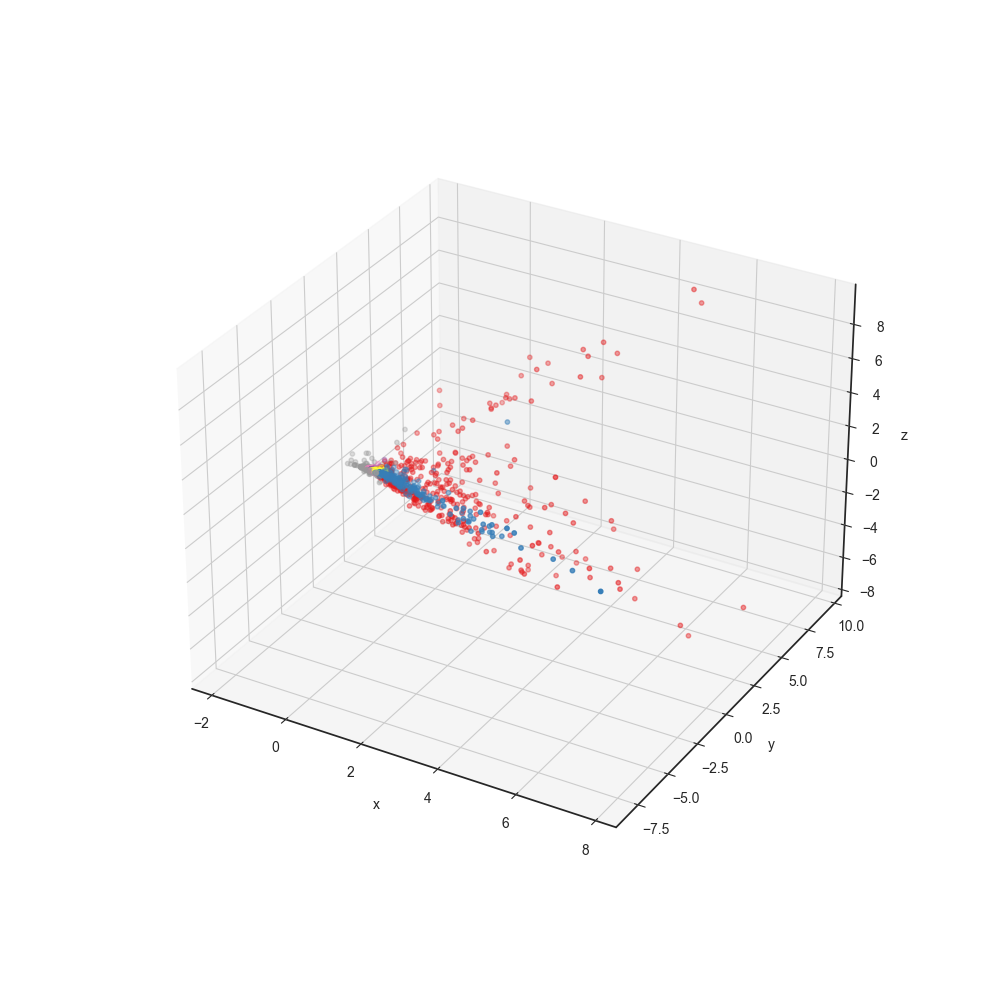

In [48]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = spectral.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## dbscan

In [49]:
%matplotlib inline

import hdbscan

In [50]:
%%time
dbscan = hdbscan.HDBSCAN(min_cluster_size=2, 
                         min_samples=1,
                        cluster_selection_epsilon=2.9)
dbscan.fit_predict(X)

analise['classe'] = dbscan.labels_
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 67.9 ms, sys: 20 µs, total: 67.9 ms
Wall time: 67.6 ms


classe,-1,0,1,2,3,4,5,6,7,8
pos_first,,,,,,,,,,
ATA,3,1,0,0,0,0,0,0,2,279
GOL,2,0,0,0,0,0,0,0,0,94
LAT,5,0,0,0,0,2,1,2,0,190
MEI,2,1,2,0,0,0,0,2,0,401
TEC,0,0,0,0,0,0,0,0,0,91
ZAG,3,0,0,2,2,3,1,0,0,192


CPU times: user 116 ms, sys: 237 ms, total: 353 ms
Wall time: 30.8 ms


Text(0.5, 0, 'z')

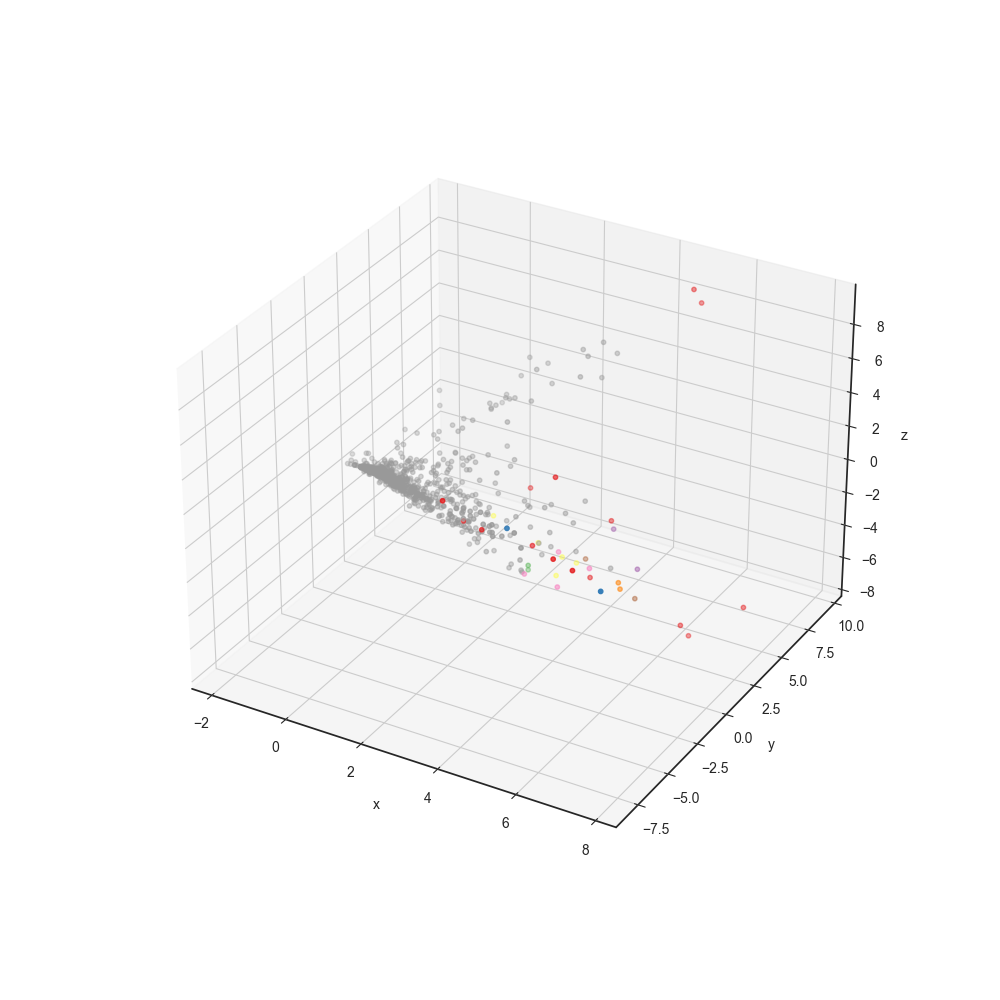

In [51]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = dbscan.labels_

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## som

In [52]:
%matplotlib inline

import somoclu

CPU times: user 3.29 s, sys: 60.5 ms, total: 3.35 s
Wall time: 226 ms


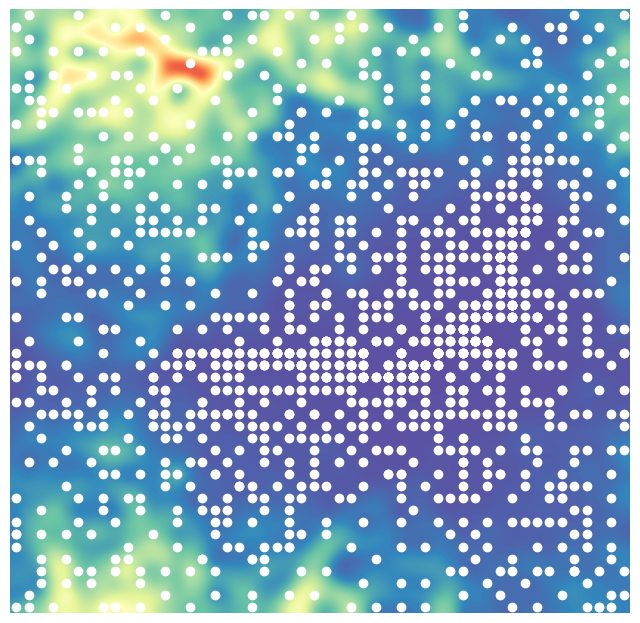

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [53]:
n_rows, n_columns = 50, 50

som = somoclu.Somoclu(n_columns, n_rows, 
                      compactsupport=False,
                      maptype="toroid")
%time som.train(X)

som.view_umatrix(bestmatches=True)

In [54]:
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

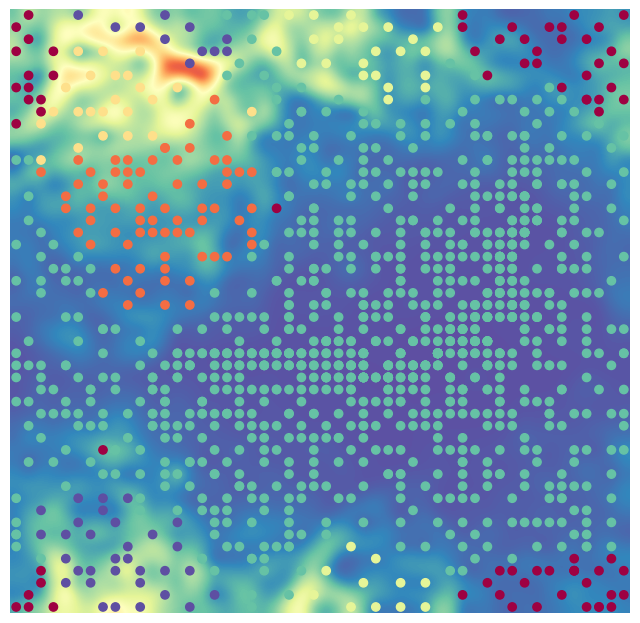

<module 'matplotlib.pyplot' from '/home/dusodeth/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [55]:
som.cluster(algorithm=aggclu)
som.view_umatrix(bestmatches=True)

In [56]:
# som.get_surface_state().shape
# som.get_surface_state()[0]

CPU times: user 719 ms, sys: 690 ms, total: 1.41 s
Wall time: 511 ms


Text(0.5, 0, 'z')

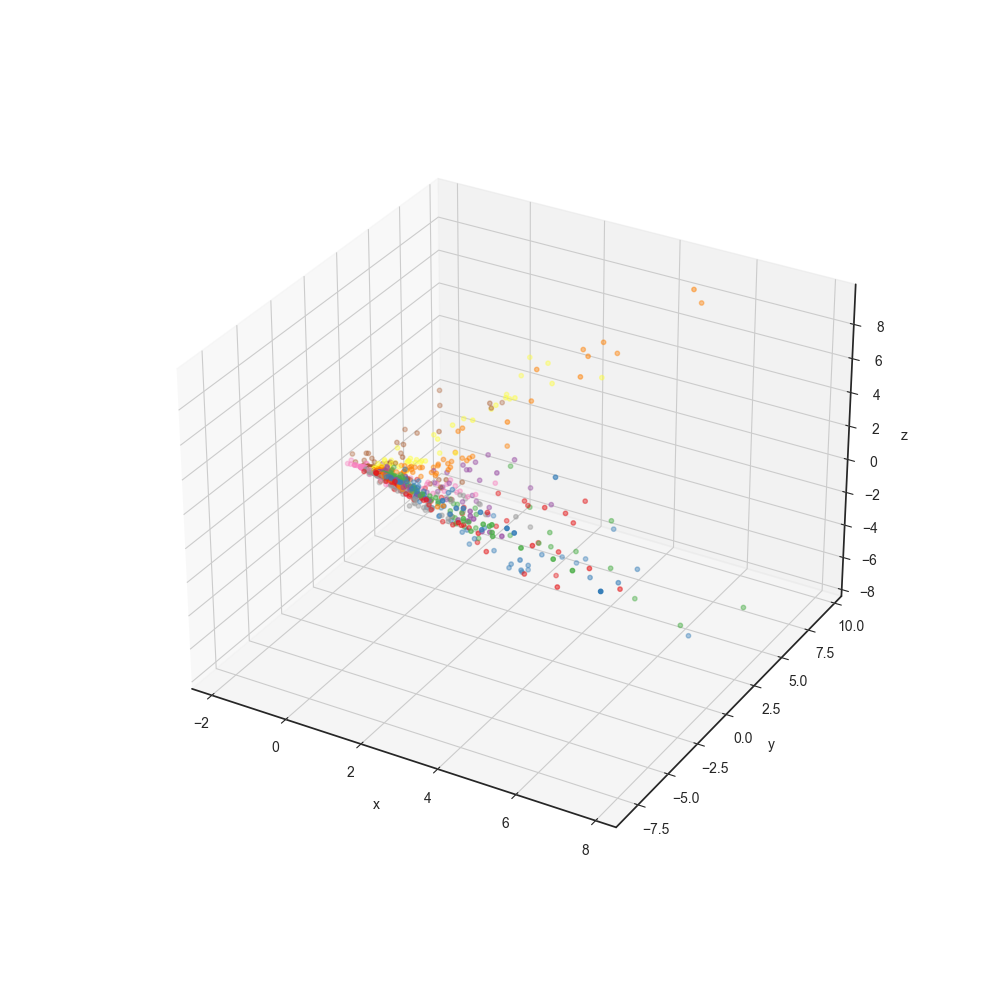

In [57]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = som.get_bmus(som.get_surface_state())[:,0]

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

CPU times: user 727 ms, sys: 702 ms, total: 1.43 s
Wall time: 526 ms


Text(0.5, 0, 'z')

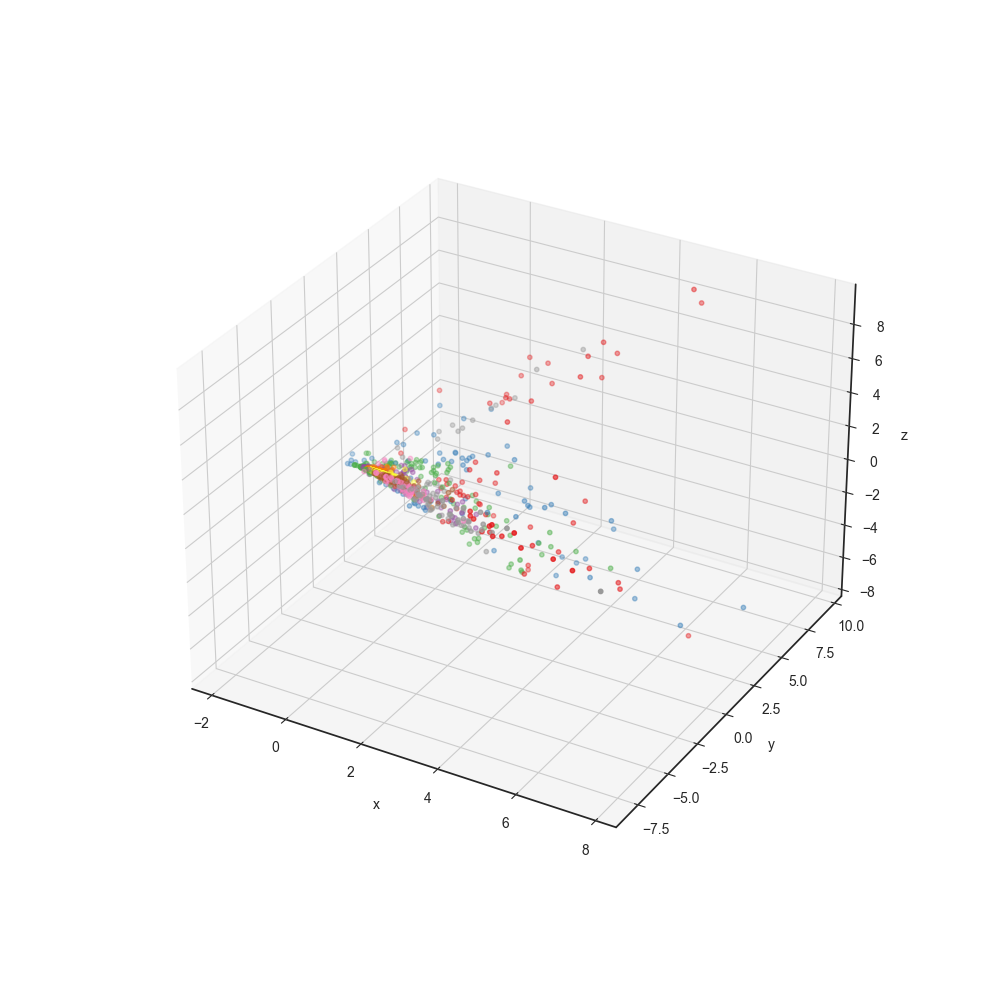

In [58]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = som.get_bmus(som.get_surface_state())[:,1]

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

- - -

In [59]:
%matplotlib inline

from minisom import MiniSom
from scipy.spatial import distance

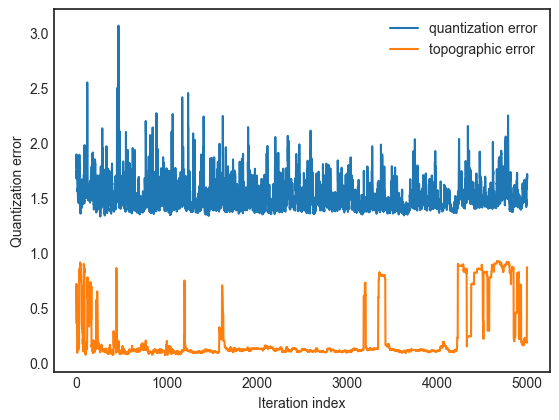

CPU times: user 3.43 s, sys: 1.92 ms, total: 3.43 s
Wall time: 3.43 s


In [60]:
%%time

som_shape = (1, 6)

som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 5000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

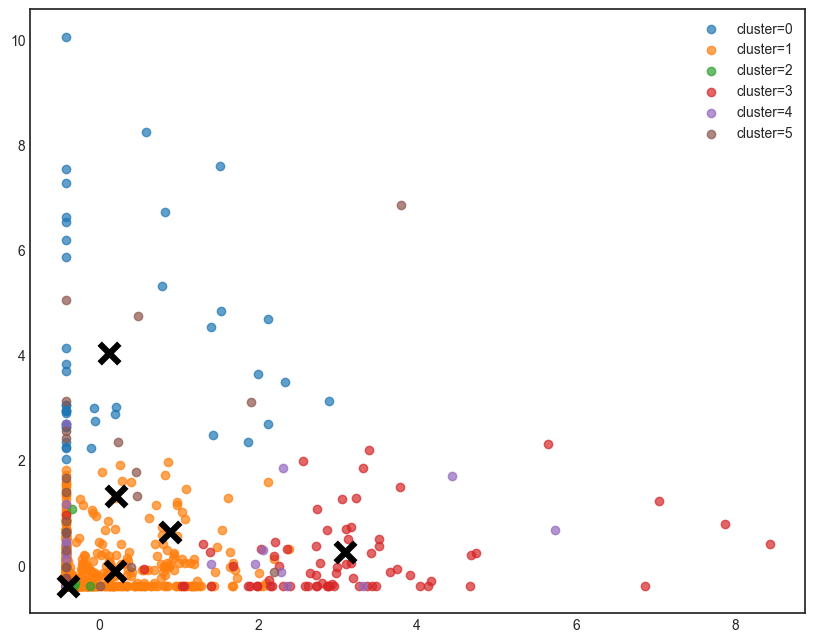

In [61]:
winner_coordinates = np.array([som.winner(x) for x in X]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.legend()

In [62]:
%%time

cols = analise.columns[:-3]
sc   = scaler.transform(analise[cols].copy().drop(columns=drop_))
dist = list()

for i,p in enumerate(sc):
    dst = [distance.euclidean(p, clu) for clu in som.get_weights()[0]]
    dist.append(dst)

analise_ = pd.concat([analise, pd.DataFrame(dist)], axis=1)

CPU times: user 55.2 ms, sys: 21.8 ms, total: 77 ms
Wall time: 58.4 ms


In [63]:
analise_

,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,DD_sum,DP_sum,...,Variação_sum,pos_first,classe,cell,0,1,2,3,4,5
0,0.0,112.0,50.0,0.0,693.0,364.0,334.0,45.0,0.0,0.0,...,2.90,MEI,8,1,1.450893,3.184033,7.228469,4.675797,9.415346,6.225483
1,0.0,16.0,16.0,20.0,95.0,17.0,5.0,0.0,0.0,0.0,...,-2.87,LAT,8,1,4.933347,2.623716,6.148964,4.333405,9.123053,5.248612
2,124.0,16.0,0.0,41.0,82.0,21.0,18.0,0.0,0.0,0.0,...,-5.29,LAT,8,1,5.090242,2.485052,5.504804,4.572788,9.326932,6.133089
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,TEC,8,1,4.634819,1.027474,6.084988,4.285529,9.320853,6.076908
4,75.0,6.0,9.0,10.0,16.0,7.0,5.0,2.0,0.0,0.0,...,4.33,ZAG,8,1,4.318409,1.146133,6.494643,3.774731,9.275013,6.305015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.22,TEC,8,1,4.507350,0.924578,6.308476,4.140976,9.320142,6.183815
1279,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,ZAG,8,1,4.634819,1.027474,6.084988,4.285529,9.320853,6.076908
1280,11.0,2.0,0.0,0.0,8.0,5.0,1.0,1.0,0.0,0.0,...,0.07,ATA,8,1,4.567227,0.971800,6.090790,4.231155,9.306849,6.057742
1281,0.0,0.0,0.0,8.0,57.0,6.0,6.0,0.0,0.0,0.0,...,-0.07,LAT,8,1,4.644243,0.975273,5.977048,4.241910,9.282427,6.072757


In [64]:
analise_['pred_clu'] = analise_[[i for i in range(6)]].idxmin(axis=1)

In [65]:
%%time

analise['classe'] = cluster_index
analise['cell']   = 1

ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 7.02 ms, sys: 407 µs, total: 7.42 ms
Wall time: 7.1 ms


classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,29,239,0,2,0,15
GOL,0,66,30,0,0,0
LAT,0,167,0,28,4,1
MEI,13,357,0,29,2,7
TEC,0,91,0,0,0,0
ZAG,0,174,1,17,11,0


In [66]:
%%time

ptab = pd.pivot_table(analise_, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'pred_clu', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

CPU times: user 8.74 ms, sys: 0 ns, total: 8.74 ms
Wall time: 8.51 ms


pred_clu,0,1,2,3,4,5
pos_first,,,,,,
ATA,29,239,0,2,0,15
GOL,0,66,30,0,0,0
LAT,0,167,0,28,4,1
MEI,13,357,0,29,2,7
TEC,0,91,0,0,0,0
ZAG,0,174,1,17,11,0


CPU times: user 78.6 ms, sys: 214 ms, total: 293 ms
Wall time: 23.8 ms


Text(0.5, 0, 'z')

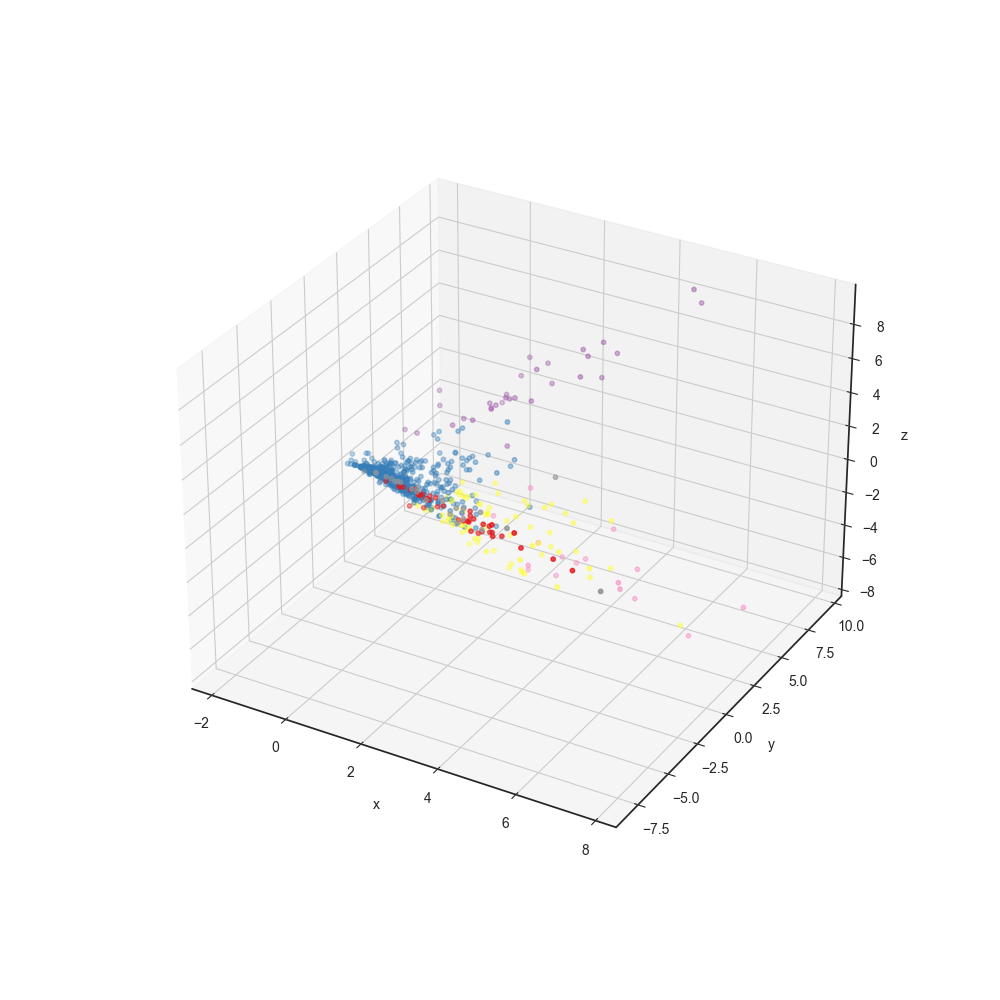

In [67]:
%%time

%matplotlib widget

pca = PCA(n_components=3)
pca.fit(X)

vis = pd.DataFrame(pca.transform(X))
vis['classe'] = cluster_index

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(vis[0], vis[1], vis[2], c=vis['classe'], cmap="Set1", s=10)
# ax.scatter(vis[0], vis[1], zs=0, zdir='z', s=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

- - -

.